In [21]:
import pandas as pd
import numpy as np
# 데이터를 수집합니다.
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
# 수집된 데이터 샘플을 확인합니다.
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [22]:
# 현재 데이터에서 포지션의 개수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

Text(0.5,1,'AST and 2P in 2d plane')

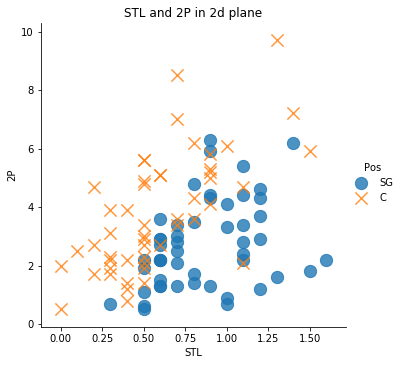

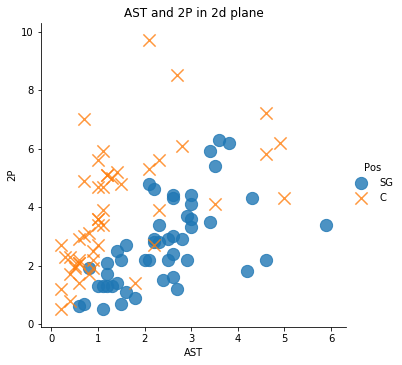

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('STL and 2P in 2d plane')

# 어시스트,2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

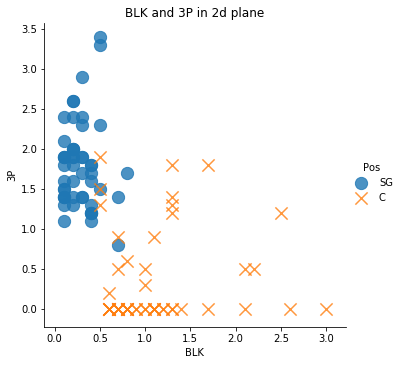

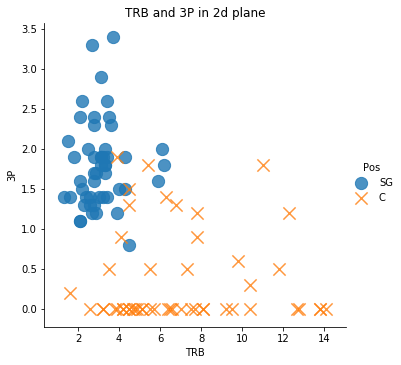

In [24]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('BLK and 3P in 2d plane')

# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('TRB and 3P in 2d plane')

In [25]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다.
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [26]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다.
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [27]:
train.shape[0]

80

In [28]:
test.shape[0]

20

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                                            scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.890873015873016,
 0.8876984126984129,
 0.9238095238095239,
 0.9238095238095239,
 0.9095238095238096,
 0.9095238095238096,
 0.9113095238095239,
 0.9255952380952381,
 0.9255952380952381,
 0.9255952380952381,
 0.9255952380952381,
 0.9255952380952381,
 0.9255952380952381,
 0.8890873015873015,
 0.8765873015873016,
 0.8609126984126985,
 0.846626984126984,
 0.846626984126984,
 0.8323412698412698]

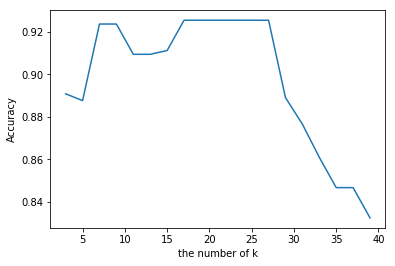

In [30]:
# k에 딸느 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 17


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# knn 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.9


In [33]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,C
2,SG,SG
3,C,C
4,SG,C
5,SG,SG
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np


def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                        {'kernel' : ['rbf'],
                         'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]}
                     ]
    # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(x_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

# 3점슛과 블로킹 횟수를 학습 데이터로 사용
x_train = train[['3P', 'BLK']]

# 농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


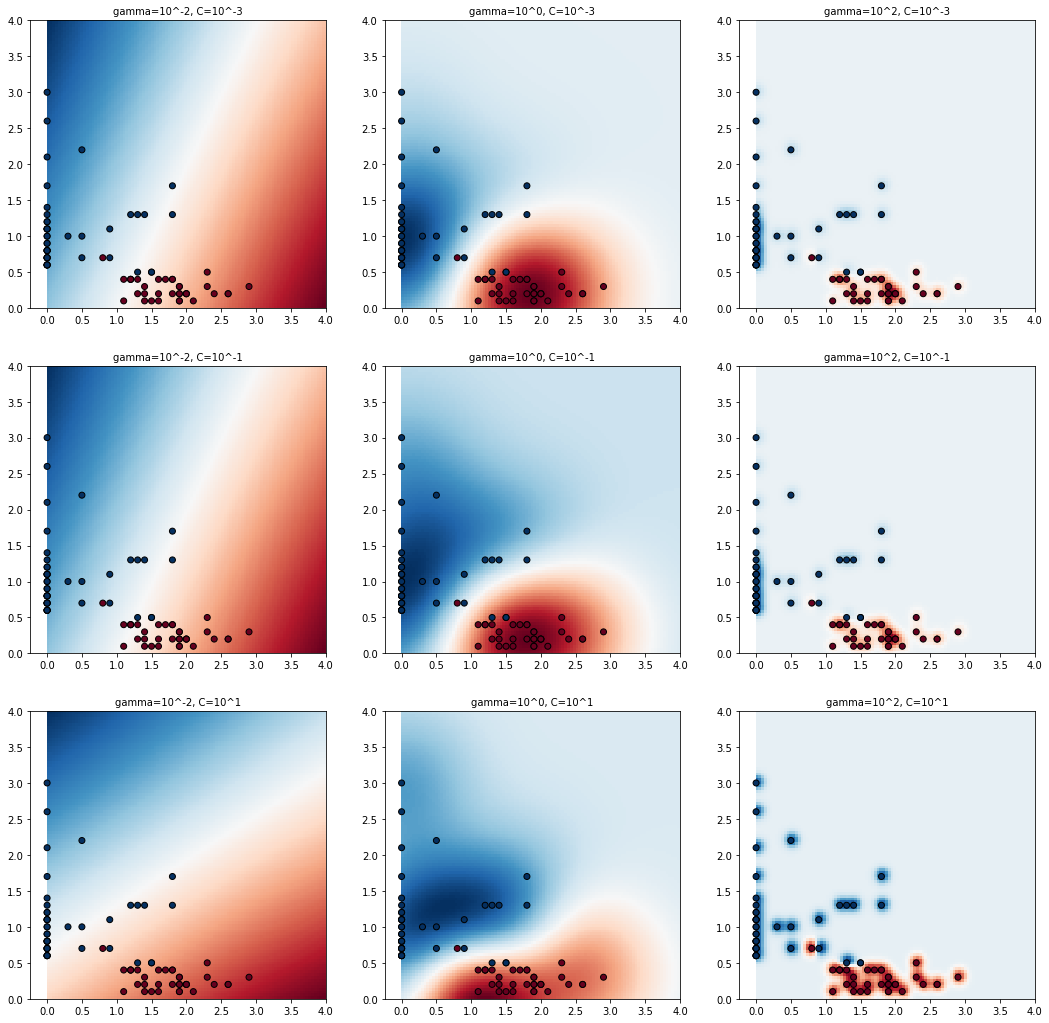

In [35]:
# 시각화할 비용 후보들을 저장
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화할 감마 후보들을 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

# 3점슛과 블로킹 횟수로 학습
x = train[['3P', 'BLK']]
# 농구선수 포지션을 학습 모델의 분류값으로 사용
y = train['Pos'].tolist()

# 시각화를 위해 센터(C)와 슈팅가드(SG)를 숫자료 표현
position = []
for gt in y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

classifiers = []

# 파라미터 후보들을 조합해서 학습된 모델들을 저장
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((C, gamma, clf))
        
# 각 모델을 시각화
plt.figure(figsize=(18, 18))
xx, yy, = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
             size='medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x['3P'], x['BLK'], c=position, cmap=plt.cm.RdBu_r,
               edgecolors='k')

In [36]:
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(x_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)) )

             precision    recall  f1-score   support

          C       0.56      0.83      0.67         6
         SG       0.91      0.71      0.80        14

avg / total       0.80      0.75      0.76        20


accuracy : 0.75


In [37]:
comparison = pd.DataFrame({'prediction':y_pred,
                          'ground_truth':y_true.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,C
2,SG,SG
3,C,C
4,C,C
5,C,SG
6,SG,SG
7,C,C
8,SG,SG
9,C,SG
